In [16]:
print("Đề bài của Nguyễn Gia Bách - Lớp 64TTNT1 - Mã số sinh viên - 2251262579:" ,(2251262579 % 7) + 1, " => Đề bài : Sunday")


Đề bài của Nguyễn Gia Bách - Lớp 64TTNT1 - Mã số sinh viên - 2251262579: 7  => Đề bài : Sunday


In [17]:
import numpy as np
import pandas as pd

df_train = pd.read_csv(r"G:\hoc\Time series\BTL\train.csv")
df_test = pd.read_csv(r"G:\hoc\Time series\BTL\test.csv")
df_sample = pd.read_csv(r"G:\hoc\Time series\BTL\sample_submission.csv")
df_train.head()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [18]:
df_train = df_train[df_train["Publication_Day"] == "Sunday"]
df_train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
6,6,Criminal Minds,Episode 47,69.83,True Crime,35.82,Sunday,Night,39.02,0.0,Neutral,64.75024
16,16,Study Sessions,Episode 82,78.47,Education,48.84,Sunday,Afternoon,NaN,2.0,Neutral,42.89441
18,18,Digital Digest,Episode 72,7.34,Technology,20.81,Sunday,Night,83.06,3.0,Positive,0.75783
42,42,Innovators,Episode 17,32.29,Technology,89.36,Sunday,Evening,42.61,3.0,Neutral,26.57501
46,46,Mind & Body,Episode 2,92.81,Health,28.52,Sunday,Evening,24.65,0.0,Positive,53.58589


In [19]:
print(df_train.isnull().sum())

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         13152
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    22423
Number_of_Ads                      0
Episode_Sentiment                  0
Listening_Time_minutes             0
dtype: int64


In [25]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

col = ["Podcast_Name","Episode_Title","Genre","Publication_Day","Publication_Time","Episode_Sentiment"]
for col in col:
    df_train[col] = label_encoder.fit_transform(df_train[col])
    
df_train = df_train.astype(float)
df_train.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
6,6.0,6.0,42.0,69.83,9.0,35.82,0.0,3.0,39.02,0.0,1.0,64.75024
16,16.0,40.0,81.0,78.47,2.0,48.84,0.0,0.0,NaN,2.0,1.0,42.89441
18,18.0,10.0,70.0,7.34,8.0,20.81,0.0,3.0,83.06,3.0,2.0,0.75783
42,42.0,23.0,9.0,32.29,8.0,89.36,0.0,1.0,42.61,3.0,1.0,26.57501
46,46.0,31.0,12.0,92.81,3.0,28.52,0.0,1.0,24.65,0.0,2.0,53.58589


1. Kalman Filter cơ bản

Kalman Filter cơ bản để làm min dữ liệu chuỗi thời gian và xử lý giá trị thiếu

In [34]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

series = df_train['Listening_Time_minutes']
model = SARIMAX(series, order=(1, 1, 1), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)
state_estimates = results.filtered_state
state_estimates

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


array([[ 3.23751200e+01,  6.47502400e+01,  4.28944100e+01, ...,
         4.01856500e+01,  5.04400000e+01,  5.31558900e+01],
       [ 3.23751200e+01, -2.18558300e+01, -4.21365800e+01, ...,
         1.02543500e+01,  2.71589000e+00,  8.01258000e+00],
       [ 0.00000000e+00,  1.94111390e-02,  2.11469102e+01, ...,
        -5.65920851e+00, -8.43067719e+00, -1.64576319e+01]])

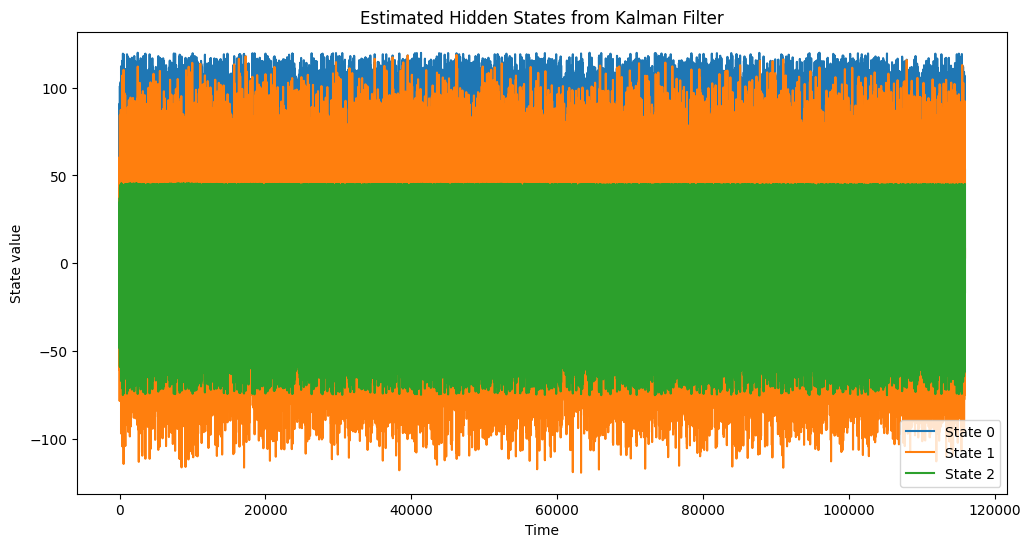

In [35]:
plt.figure(figsize=(12, 6))
for i in range(state_estimates.shape[0]):
    plt.plot(state_estimates[i], label=f'State {i}')
plt.title('Estimated Hidden States from Kalman Filter')
plt.xlabel('Time')
plt.ylabel('State value')
plt.legend()
plt.show()

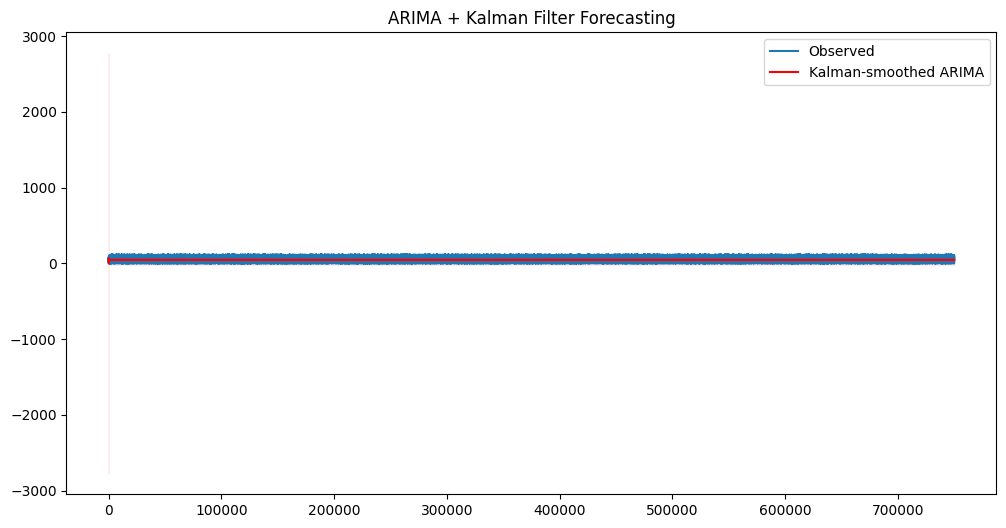

In [36]:
forecast = results.get_prediction()
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()
plt.figure(figsize=(12, 6))
plt.plot(series.index, series, label='Observed')
plt.plot(predicted_mean.index, predicted_mean, color='red', label='Kalman-smoothed ARIMA')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('ARIMA + Kalman Filter Forecasting')
plt.show()

In [ ]:
df_test = df_test[df_test["Publication_Day"] == "Sunday"]
df_sample = df_sample[df_sample["Publication_Day"] == "Sunday"]